In [68]:
# %%
from sqlalchemy import create_engine
import pandas as pd

# Create a connection to PostgreSQL using SQLAlchemy
db_config = {
    "user": "postgres",
    "password": "password",
    "host": "localhost",
    "port": "5432",
    "dbname": "finance"
}
connection_string = (
    f"postgresql://{db_config['user']}:{db_config['password']}@"
    f"{db_config['host']}:{db_config['port']}/{db_config['dbname']}"
)
engine = create_engine(connection_string)

# SQL queries to read data from database tables
stock_query = "SELECT * FROM stock_data;"
index_query = "SELECT * FROM index_data;"
macro_query = "SELECT * FROM macro_data;"

# Read tables into pandas DataFrames
stock_data = pd.read_sql_query(stock_query, con=engine)
index_data = pd.read_sql_query(index_query, con=engine)
macro_data = pd.read_sql_query(macro_query, con=engine)

# Convert date columns to datetime
stock_data['date'] = pd.to_datetime(stock_data['date'])
index_data['date'] = pd.to_datetime(index_data['date'])
macro_data['date'] = pd.to_datetime(macro_data['date'])

# Define date ranges for modeling and prediction
modeling_start_date = '1900-01-01'
modeling_end_date = '2024-01-01'
prediction_start_date = '2024-01-01'
prediction_end_date = '2024-12-31'

# Split stock_data into modeling set and prediction set
pred_stock_data = stock_data[
    (stock_data['date'] >= prediction_start_date) &
    (stock_data['date'] <= prediction_end_date)
]
stock_data = stock_data[
    (stock_data['date'] >= modeling_start_date) &
    (stock_data['date'] < modeling_end_date)
]

# Split index_data into modeling set and prediction set
pred_index_data = index_data[
    (index_data['date'] >= prediction_start_date) &
    (index_data['date'] <= prediction_end_date)
]
index_data = index_data[
    (index_data['date'] >= modeling_start_date) &
    (index_data['date'] < modeling_end_date)
]

# Split macro_data into modeling set and prediction set
pred_macro_data = macro_data[
    (macro_data['date'] >= prediction_start_date) &
    (macro_data['date'] <= prediction_end_date)
]
macro_data = macro_data[
    (macro_data['date'] >= modeling_start_date) &
    (macro_data['date'] < modeling_end_date)
]


In [69]:
print(stock_data.head())

   id ticker       date      open      high       low     close  adj_close  \
0   1   AAPL 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098834   
1   2   AAPL 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093678   
2   3   AAPL 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086802   
3   4   AAPL 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.088951   
4   5   AAPL 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091530   

      volume  
0  469033600  
1  175884800  
2  105728000  
3   86441600  
4   73449600  


In [70]:
print(index_data.head())

   id index_name       date       open       high        low      close  \
0   1      ^GSPC 1927-12-30  17.660000  17.660000  17.660000  17.660000   
1   2      ^GSPC 1928-01-03  17.760000  17.760000  17.760000  17.760000   
2   3      ^GSPC 1928-01-04  17.719999  17.719999  17.719999  17.719999   
3   4      ^GSPC 1928-01-05  17.549999  17.549999  17.549999  17.549999   
4   5      ^GSPC 1928-01-06  17.660000  17.660000  17.660000  17.660000   

   adj_close  volume  
0  17.660000       0  
1  17.760000       0  
2  17.719999       0  
3  17.549999       0  
4  17.660000       0  


In [71]:
print(macro_data.head())

   id symbol       date        open        high         low       close  \
0   1   GC=F 2000-08-30  273.899994  273.899994  273.899994  273.899994   
1   2   GC=F 2000-08-31  274.799988  278.299988  274.799988  278.299988   
2   3   GC=F 2000-09-01  277.000000  277.000000  277.000000  277.000000   
3   4   GC=F 2000-09-05  275.799988  275.799988  275.799988  275.799988   
4   5   GC=F 2000-09-06  274.200012  274.200012  274.200012  274.200012   

   volume  
0       0  
1       0  
2       0  
3       2  
4       0  


In [72]:
# Filter only Apple (AAPL) from stock_data
apple_data = stock_data[stock_data['ticker'] == 'AAPL'].copy()

# Drop unnecessary columns
apple_data = apple_data.drop(columns=['id', 'ticker'], errors='ignore')

# Display the first few rows
print(apple_data.head())

# Show the shape of the Apple DataFrame
print(f"Apple dataset shape: {apple_data.shape}")

        date      open      high       low     close  adj_close     volume
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098834  469033600
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093678  175884800
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086802  105728000
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.088951   86441600
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091530   73449600
Apple dataset shape: (10853, 7)


In [73]:
# Display basic descriptive statistics for Apple data
print(apple_data.describe())

                                date          open          high  \
count                          10853  10853.000000  10853.000000   
mean   2002-06-13 10:08:04.953469056     20.058032     20.277636   
min              1980-12-12 00:00:00      0.049665      0.049665   
25%              1991-09-06 00:00:00      0.294643      0.301339   
50%              2002-06-11 00:00:00      0.508929      0.517857   
75%              2013-03-21 00:00:00     18.895714     19.043928   
max              2023-12-29 00:00:00    198.020004    199.619995   
std                              NaN     41.940333     42.403593   

                low         close     adj_close        volume  
count  10853.000000  10853.000000  10853.000000  1.085300e+04  
mean      19.846894     20.071533     19.226723  3.214835e+08  
min        0.049107      0.049107      0.037815  0.000000e+00  
25%        0.287946      0.294643      0.240206  1.160708e+08  
50%        0.502232      0.511161      0.416211  2.090368e+08  
75%

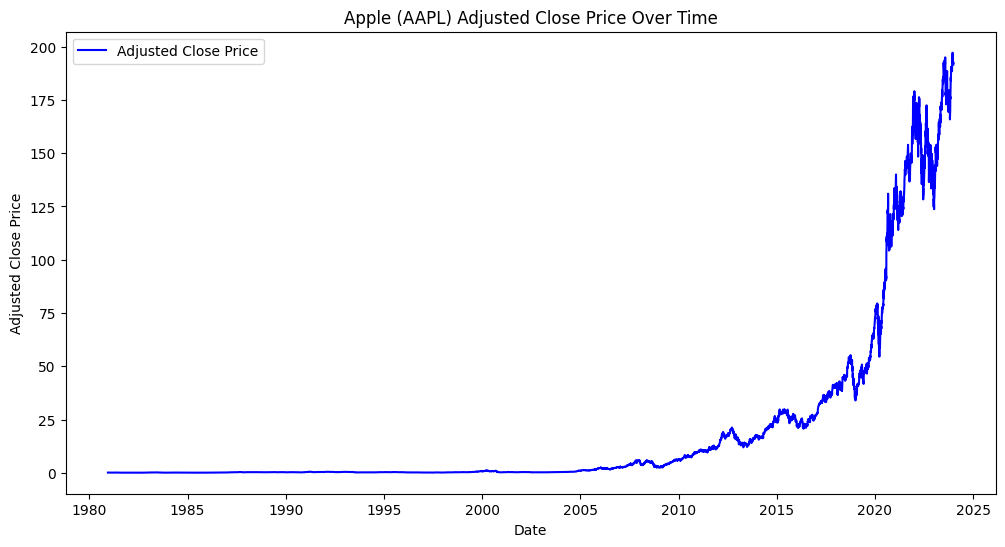

In [74]:
import matplotlib.pyplot as plt

# Plot the Adjusted Close price over time for Apple
plt.figure(figsize=(12, 6))
plt.plot(apple_data['date'], apple_data['adj_close'], label='Adjusted Close Price', color='blue')
plt.title('Apple (AAPL) Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [75]:
# Extract Apple's adjusted close prices and rename the column
apple_prices = apple_data[['date', 'adj_close']].rename(columns={'adj_close': 'apple_close'})

# Reshape index_data to get adjusted close prices for each index
index_prices = index_data.pivot(index='date', columns='index_name', values='adj_close')

# Merge Apple prices with index prices on the date
merged_index_data = pd.merge(apple_prices, index_prices, on='date', how='inner')

# Preview the merged DataFrame
print(merged_index_data.head())

# Reshape macro_data to get close prices for each symbol
macro_prices = macro_data.pivot(index='date', columns='symbol', values='close')

# Merge Apple prices with macro prices on the date
merged_macro_data = pd.merge(apple_prices, macro_prices, on='date', how='inner')

# Preview the merged macro DataFrame
print(merged_macro_data.head())

        date  apple_close  NQ=F  RTY=F  ^DJI       ^GSPC
0 1980-12-12     0.098834   NaN    NaN   NaN  129.229996
1 1980-12-15     0.093678   NaN    NaN   NaN  129.449997
2 1980-12-16     0.086802   NaN    NaN   NaN  130.600006
3 1980-12-17     0.088951   NaN    NaN   NaN  132.889999
4 1980-12-18     0.091530   NaN    NaN   NaN  133.000000
        date  apple_close  CL=F   DX-Y.NYB  GC=F       ^IRX   ^TNX  ^VIX
0 1980-12-12     0.098834   NaN  92.279999   NaN  16.549999  13.21   NaN
1 1980-12-15     0.093678   NaN  91.760002   NaN  16.770000  13.25   NaN
2 1980-12-16     0.086802   NaN  92.660004   NaN  16.700001  13.51   NaN
3 1980-12-17     0.088951   NaN  91.500000   NaN  16.469999  13.28   NaN
4 1980-12-18     0.091530   NaN  91.809998   NaN  16.200001  13.22   NaN


In [76]:
# Remove the 'date' column before correlation calculations
merged_index_data = merged_index_data.drop(columns=['date'])
merged_macro_data = merged_macro_data.drop(columns=['date'])

# Calculate correlation matrices
correlation_matrix_1 = merged_index_data.corr()
correlation_matrix_2 = merged_macro_data.corr()

# Extract correlations involving 'apple_close'
correlation_1 = correlation_matrix_1['apple_close'].drop('apple_close')
correlation_2 = correlation_matrix_2['apple_close'].drop('apple_close')

# Print correlation values
print(correlation_1)
print(correlation_2)

NQ=F     0.976528
RTY=F    0.701872
^DJI     0.902706
^GSPC    0.895099
Name: apple_close, dtype: float64
CL=F        0.191006
DX-Y.NYB    0.007330
GC=F        0.726461
^IRX       -0.282593
^TNX       -0.428891
^VIX        0.020431
Name: apple_close, dtype: float64


In [77]:
# Filter only the Nasdaq futures (NQ=F) from index_data
nasdaq_data = index_data[index_data['index_name'] == 'NQ=F'].copy()

# Remove unnecessary columns
nasdaq_data = nasdaq_data.drop(columns=['id', 'ticker'], errors='ignore')

# Display the first few rows
print(nasdaq_data.head())

# Show the shape of the filtered Nasdaq dataset
print(f"Filtered Nasdaq dataset shape: {nasdaq_data.shape}")

      index_name       date    open    high     low   close  adj_close  volume
24367       NQ=F 2000-09-18  3721.0  3785.5  3602.0  3653.5     3653.5   72994
24368       NQ=F 2000-09-19  3658.5  3817.0  3656.0  3804.0     3804.0   70029
24369       NQ=F 2000-09-20  3801.5  3874.0  3715.5  3853.0     3853.0   78832
24370       NQ=F 2000-09-21  3852.0  3874.0  3744.0  3765.0     3765.0   70719
24371       NQ=F 2000-09-22  3673.0  3780.0  3615.0  3776.0     3776.0   55926
Filtered Nasdaq dataset shape: (5882, 8)


In [78]:
# Filter only the gold futures (GC=F) from macro_data
gold_data = macro_data[macro_data['symbol'] == 'GC=F'].copy()

# Drop unnecessary columns such as 'id' and 'symbol'
gold_data = gold_data.drop(columns=['id', 'symbol'], errors='ignore')

# Display the first few rows
print(gold_data.head())

# Show the shape of the filtered gold dataset
print(f"Filtered Gold (GC=F) dataset shape: {gold_data.shape}")

        date        open        high         low       close  volume
0 2000-08-30  273.899994  273.899994  273.899994  273.899994       0
1 2000-08-31  274.799988  278.299988  274.799988  278.299988       0
2 2000-09-01  277.000000  277.000000  277.000000  277.000000       0
3 2000-09-05  275.799988  275.799988  275.799988  275.799988       2
4 2000-09-06  274.200012  274.200012  274.200012  274.200012       0
Filtered Gold (GC=F) dataset shape: (5854, 6)


In [79]:
# Rename columns in the gold DataFrame for clarity
gold_data = gold_data.rename(columns={
    'open': 'gold_open',
    'high': 'gold_high',
    'low': 'gold_low',
    'close': 'gold_close',
    'adj_close': 'gold_adj_close',
    'volume': 'gold_volume'
})

# Display the renamed gold DataFrame
print(gold_data.head())

        date   gold_open   gold_high    gold_low  gold_close  gold_volume
0 2000-08-30  273.899994  273.899994  273.899994  273.899994            0
1 2000-08-31  274.799988  278.299988  274.799988  278.299988            0
2 2000-09-01  277.000000  277.000000  277.000000  277.000000            0
3 2000-09-05  275.799988  275.799988  275.799988  275.799988            2
4 2000-09-06  274.200012  274.200012  274.200012  274.200012            0


In [80]:
# Merge Apple data with Nasdaq data
merged_data = pd.merge(apple_data, nasdaq_data, on='date', how='inner', suffixes=('_apple', '_nasdaq'))

# Merge the result with the gold data
merged_data = pd.merge(merged_data, gold_data, on='date', how='inner', suffixes=('', '_gold'))

# Preview the merged dataset
print(merged_data.head())

# Show the shape of the merged dataset
print(f"Merged dataset shape: {merged_data.shape}")

        date  open_apple  high_apple  low_apple  close_apple  adj_close_apple  \
0 2000-09-18    0.986607    1.084821   0.983259     1.083147         0.913686   
1 2000-09-19    1.066964    1.080357   1.045759     1.070313         0.902860   
2 2000-09-20    1.060826    1.097098   1.045759     1.090123         0.919570   
3 2000-09-21    1.044643    1.064732   0.986607     1.012277         0.853903   
4 2000-09-22    0.898438    0.936384   0.892857     0.931920         0.786118   

   volume_apple index_name  open_nasdaq  high_nasdaq  low_nasdaq  \
0     424536000       NQ=F       3721.0       3785.5      3602.0   
1     271510400       NQ=F       3658.5       3817.0      3656.0   
2     227388000       NQ=F       3801.5       3874.0      3715.5   
3     510490400       NQ=F       3852.0       3874.0      3744.0   
4     726700800       NQ=F       3673.0       3780.0      3615.0   

   close_nasdaq  adj_close_nasdaq  volume_nasdaq   gold_open   gold_high  \
0        3653.5            3

In [81]:
merged_data.columns

Index(['date', 'open_apple', 'high_apple', 'low_apple', 'close_apple',
       'adj_close_apple', 'volume_apple', 'index_name', 'open_nasdaq',
       'high_nasdaq', 'low_nasdaq', 'close_nasdaq', 'adj_close_nasdaq',
       'volume_nasdaq', 'gold_open', 'gold_high', 'gold_low', 'gold_close',
       'gold_volume'],
      dtype='object')

In [82]:
# Function for analyzing missing data
def analyze_missing_data(data, name):
    missing_count = data.isnull().sum()
    missing_report = pd.DataFrame({
        'Missing Count': missing_count,
    })
    print(f"\nMissing Data Analysis for {name}:\n")
    print(missing_report)
    return missing_report

missing = analyze_missing_data(merged_data, 'merged_data')


Missing Data Analysis for merged_data:

                  Missing Count
date                          0
open_apple                    0
high_apple                    0
low_apple                     0
close_apple                   0
adj_close_apple               0
volume_apple                  0
index_name                    0
open_nasdaq                   0
high_nasdaq                   0
low_nasdaq                    0
close_nasdaq                  0
adj_close_nasdaq              0
volume_nasdaq                 0
gold_open                     0
gold_high                     0
gold_low                      0
gold_close                    0
gold_volume                   0


In [83]:
import pandas as pd

def calculate_rsi(series, window=14):
    """
    Calculate the Relative Strength Index (RSI) for a given price series.
    :param series: Series of prices (e.g., closing prices).
    :param window: Lookback period for RSI (default=14).
    :return: A pandas Series containing RSI values.
    """
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def calculate_technical_indicators(data, close_column='adj_close'):
    """
    Compute a set of technical indicators for the given DataFrame.
    :param data: DataFrame containing at least the 'adj_close' price column.
    :param close_column: Column name for the adjusted close price (default='adj_close').
    :return: The DataFrame with new indicator columns added.
    """
    # Percentage change
    data['pct_change'] = data[close_column].pct_change() * 100

    # Simple Moving Averages
    data['ma7'] = data[close_column].rolling(window=7).mean()
    data['ma20'] = data[close_column].rolling(window=20).mean()
    data['ma30'] = data[close_column].rolling(window=30).mean()

    # Exponential Moving Averages
    data['ema12'] = data[close_column].ewm(span=12, adjust=False).mean()
    data['ema26'] = data[close_column].ewm(span=26, adjust=False).mean()

    # MACD and its signal/histogram
    data['macd'] = data['ema12'] - data['ema26']
    data['signal_line'] = data['macd'].ewm(span=9, adjust=False).mean()
    data['macd_histogram'] = data['macd'] - data['signal_line']

    # Volatility (standard deviation over a rolling window)
    data['volatility'] = data[close_column].rolling(window=10).std()

    # Bollinger Bands (using 20-day SMA and rolling std)
    rolling_std = data[close_column].rolling(window=20).std()
    data['bb_upper'] = data['ma20'] + 2 * rolling_std
    data['bb_lower'] = data['ma20'] - 2 * rolling_std

    # RSI
    data['rsi'] = calculate_rsi(data[close_column])

    return data

# Apply technical indicators to Apple data
apple_data = calculate_technical_indicators(apple_data)

# Select columns to keep for further analysis
technical_indicators = [
    'date',
    'ma7', 'ma20', 'ma30',
    'ema12', 'ema26',
    'macd', 'signal_line', 'macd_histogram',
    'volatility', 'bb_upper', 'bb_lower',
    'rsi'
]
apple_data_ti = apple_data[technical_indicators]

In [84]:
apple_data_ti

,date,ma7,ma20,ma30,ema12,ema26,macd,signal_line,macd_histogram,volatility,bb_upper,bb_lower,rsi
0,1980-12-12,NaN,NaN,NaN,0.098834,0.098834,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1,1980-12-15,NaN,NaN,NaN,0.098041,0.098453,-0.000411,-0.000082,-0.000329,NaN,NaN,NaN,NaN
2,1980-12-16,NaN,NaN,NaN,0.096312,0.097590,-0.001277,-0.000321,-0.000956,NaN,NaN,NaN,NaN
3,1980-12-17,NaN,NaN,NaN,0.095180,0.096950,-0.001770,-0.000611,-0.001159,NaN,NaN,NaN,NaN
4,1980-12-18,NaN,NaN,NaN,0.094618,0.096548,-0.001930,-0.000875,-0.001055,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10848,2023-12-22,194.990452,192.724343,191.156523,193.787962,191.142913,2.645049,3.249888,-0.604838,1.801699,198.517989,186.930697,59.246133
10849,2023-12-26,194.271120,192.886549,191.377109,193.529638,191.214464,2.315174,3.062945,-0.747771,1.822424,198.400096,187.373002,49.031924
10850,2023-12-27,193.642770,193.023379,191.654086,193.326367,191.288087,2.038280,2.858012,-0.819732,1.978322,198.311319,187.735439,52.291566
10851,2023-12-28,193.314381,193.232853,191.857756,193.220201,191.387954,1.832247,2.652859,-0.820612,1.875525,198.070169,188.395537,47.920499


In [85]:
missing = analyze_missing_data(apple_data_ti,'technical indicators')


Missing Data Analysis for technical indicators:

                Missing Count
date                        0
ma7                         6
ma20                       19
ma30                       29
ema12                       0
ema26                       0
macd                        0
signal_line                 0
macd_histogram              0
volatility                  9
bb_upper                   19
bb_lower                   19
rsi                        13


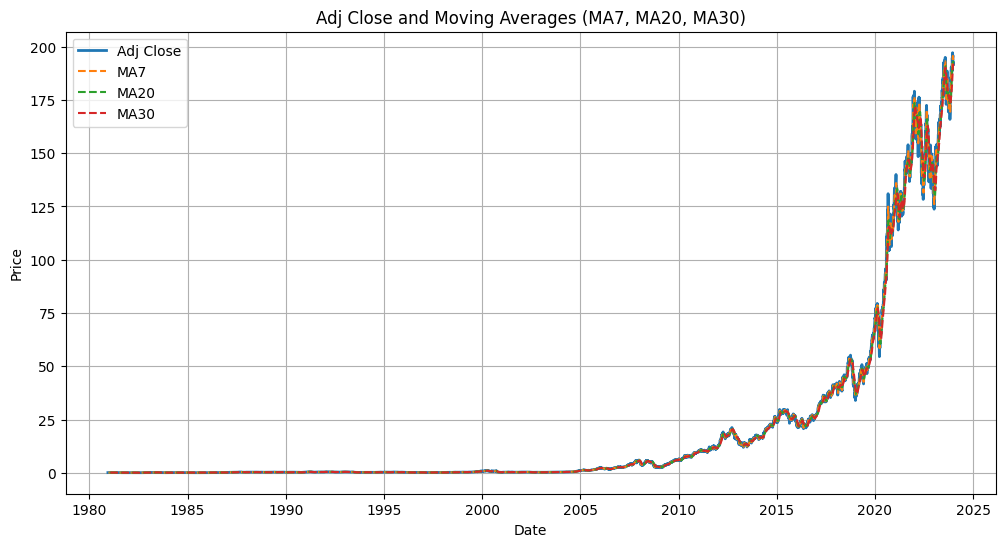

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(apple_data['date'], apple_data['adj_close'], label='Adj Close', linewidth=2)
plt.plot(apple_data['date'], apple_data['ma7'], label='MA7', linestyle='--')
plt.plot(apple_data['date'], apple_data['ma20'], label='MA20', linestyle='--')
plt.plot(apple_data['date'], apple_data['ma30'], label='MA30', linestyle='--')
plt.title('Adj Close and Moving Averages (MA7, MA20, MA30)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

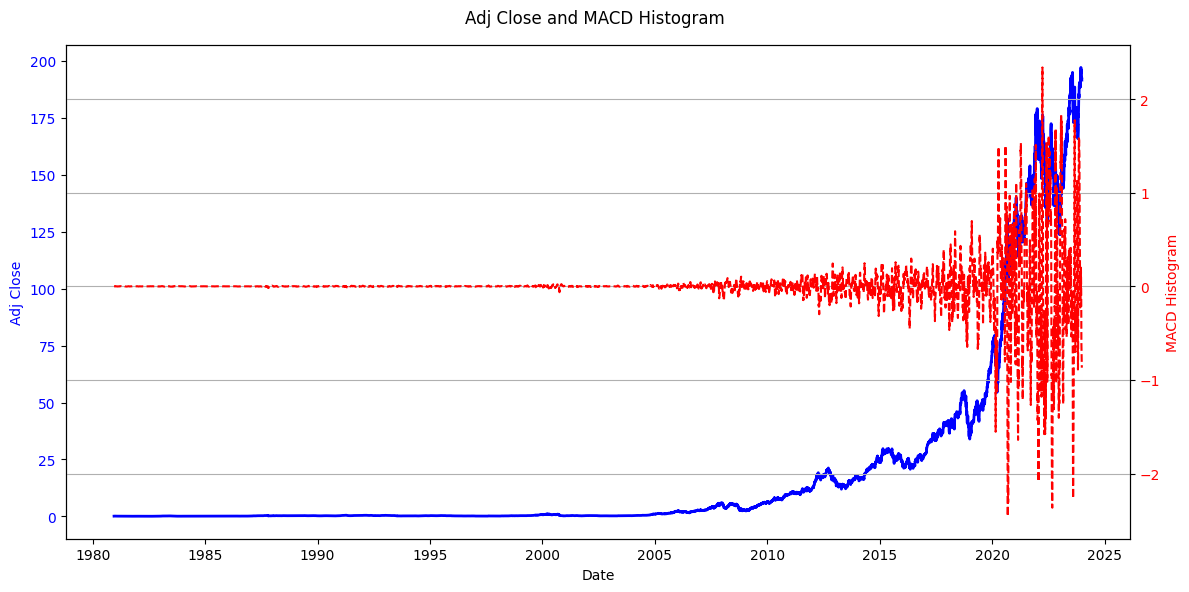

In [87]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Adj Close on the first axis
ax1.plot(apple_data['date'], apple_data['adj_close'], label='Adj Close', color='blue', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Adj Close', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot MACD Histogram on the secondary axis
ax2 = ax1.twinx()
ax2.plot(apple_data['date'], apple_data['macd_histogram'], label='MACD Histogram', color='red', linestyle='--')
ax2.set_ylabel('MACD Histogram', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('Adj Close and MACD Histogram')
fig.tight_layout()
plt.grid(True)
plt.show()

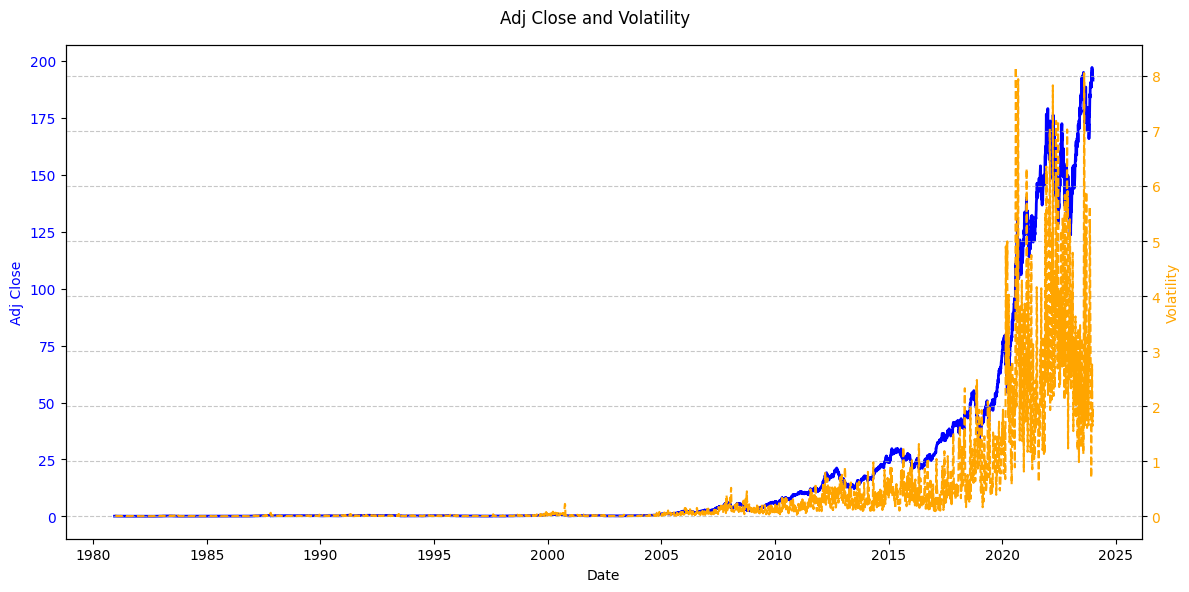

In [88]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Adj Close on the first axis
ax1.plot(apple_data['date'], apple_data['adj_close'], label='Adj Close', color='blue', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Adj Close', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Volatility on the secondary axis
ax2 = ax1.twinx()
ax2.plot(apple_data['date'], apple_data['volatility'], label='Volatility', color='orange', linestyle='--')
ax2.set_ylabel('Volatility', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.suptitle('Adj Close and Volatility')
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

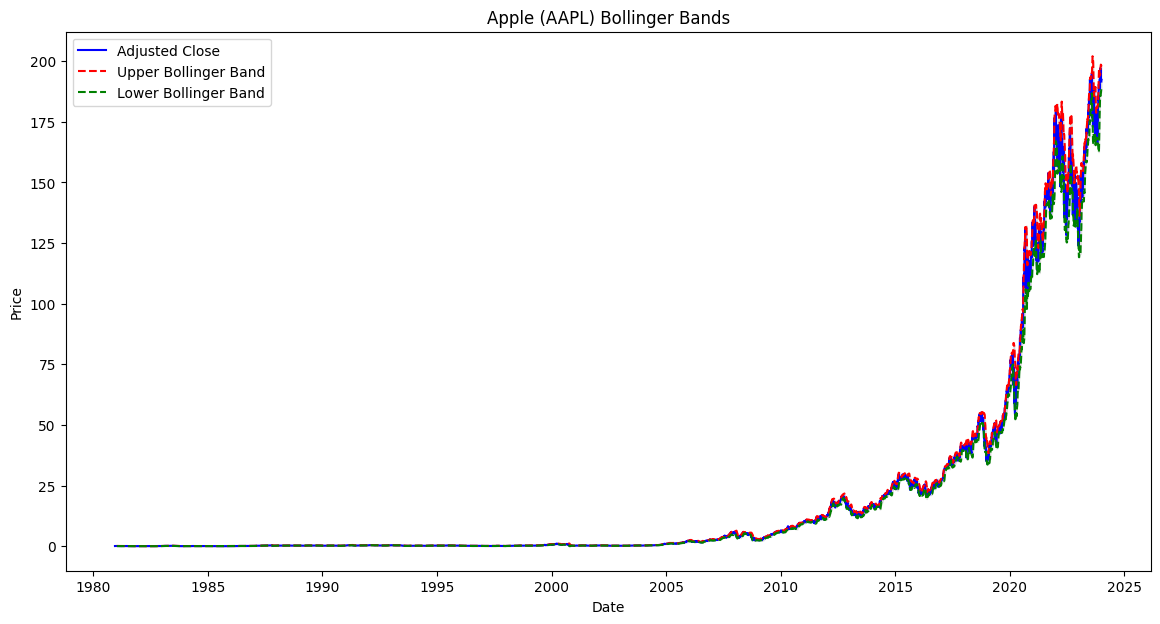

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(apple_data['date'], apple_data['adj_close'], label='Adjusted Close', color='blue')
plt.plot(apple_data['date'], apple_data['bb_upper'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(apple_data['date'], apple_data['bb_lower'], label='Lower Bollinger Band', color='green', linestyle='--')
plt.fill_between(apple_data['date'], apple_data['bb_lower'], apple_data['bb_upper'], color='gray', alpha=0.2)
plt.title('Apple (AAPL) Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

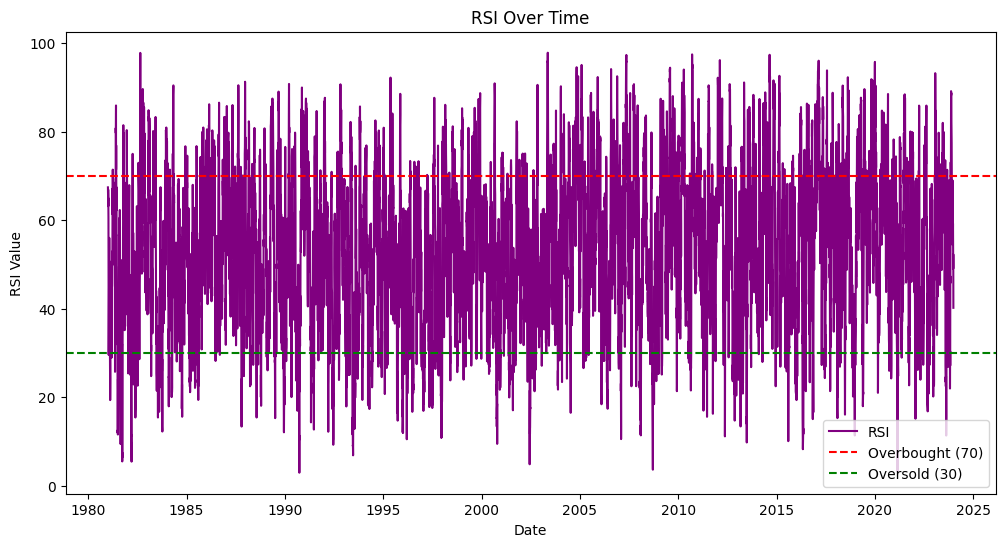

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(apple_data['date'], apple_data['rsi'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI Over Time')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.show()

In [91]:
# Merge Apple technical indicators into the main merged_data DataFrame
merged_data = pd.merge(merged_data, apple_data_ti, on='date', how='inner', suffixes=('', '_apple_indicators'))

# Print the dataset shape
print(f"Dataset shape: {merged_data.shape}")

# Preview the first few rows
merged_data.head()

Dataset shape: (5839, 31)


,date,open_apple,high_apple,low_apple,close_apple,adj_close_apple,volume_apple,index_name,open_nasdaq,high_nasdaq,...,ma30,ema12,ema26,macd,signal_line,macd_histogram,volatility,bb_upper,bb_lower,rsi
0,2000-09-18,0.986607,1.084821,0.983259,1.083147,0.913686,424536000,NQ=F,3721.0,3785.5,...,0.823643,0.875732,0.851376,0.024355,0.029941,-0.005586,0.033817,0.973116,0.773078,54.870874
1,2000-09-19,1.066964,1.080357,1.045759,1.070313,0.902860,271510400,NQ=F,3658.5,3817.0,...,0.829669,0.879905,0.855190,0.024715,0.028896,-0.004181,0.028906,0.965750,0.794661,51.430307
2,2000-09-20,1.060826,1.097098,1.045759,1.090123,0.919570,227388000,NQ=F,3801.5,3874.0,...,0.836847,0.886008,0.859959,0.026049,0.028326,-0.002278,0.031084,0.959786,0.814723,52.862979
3,2000-09-21,1.044643,1.064732,0.986607,1.012277,0.853903,510490400,NQ=F,3852.0,3874.0,...,0.841460,0.881068,0.859510,0.021558,0.026973,-0.005415,0.027762,0.955943,0.822144,42.901791
4,2000-09-22,0.898438,0.936384,0.892857,0.931920,0.786118,726700800,NQ=F,3673.0,3780.0,...,0.843783,0.866461,0.854074,0.012387,0.024056,-0.011669,0.040099,0.965236,0.806942,32.387415


In [92]:
# Select only numeric columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Retrieve correlations with 'adj_close_apple' and sort them
correlation_with_adj_close = correlation_matrix['adj_close_apple'].sort_values(ascending=False)

# Filter based on a threshold if desired (here just labeled as strong_correlations)
strong_correlations = correlation_with_adj_close

print("Strong correlations with 'adj_close_apple':")
print(strong_correlations)

Strong correlations with 'adj_close_apple':
adj_close_apple     1.000000
close_apple         0.999818
low_apple           0.999744
high_apple          0.999738
open_apple          0.999651
ma7                 0.999594
ema12               0.999455
ema26               0.998745
ma20                0.998673
bb_upper            0.998256
bb_lower            0.998125
ma30                0.997959
high_nasdaq         0.976883
adj_close_nasdaq    0.976529
close_nasdaq        0.976529
open_nasdaq         0.976463
low_nasdaq          0.976148
volatility          0.848811
gold_low            0.727836
gold_close          0.726463
gold_open           0.726223
gold_high           0.725315
volume_nasdaq       0.630774
signal_line         0.301881
macd                0.288071
rsi                 0.026816
macd_histogram      0.014544
gold_volume         0.014503
volume_apple       -0.455999
Name: adj_close_apple, dtype: float64


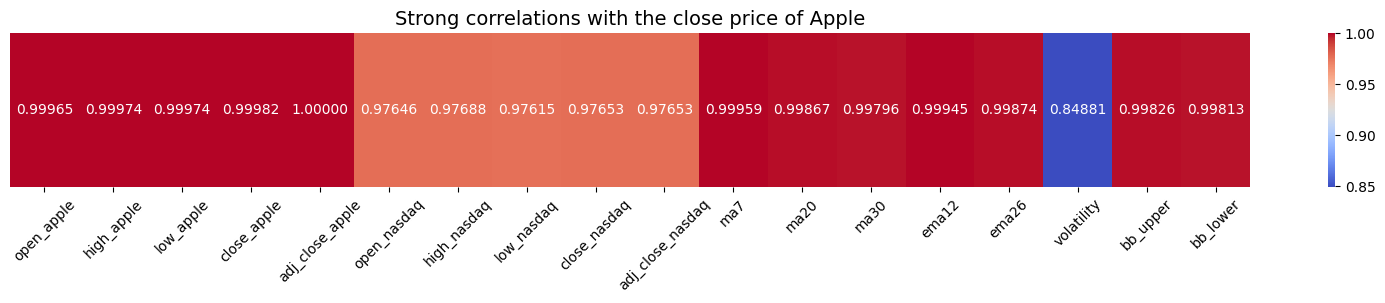

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

strong_corr = correlation_matrix['adj_close_apple'][abs(correlation_matrix['adj_close_apple']) > 0.75]

plt.figure(figsize=(20, 2))  # Increase width for a single-row heatmap
sns.heatmap(
    strong_corr.to_frame().T,
    annot=True,
    fmt=".5f",
    cmap="coolwarm",
    cbar=True,
    annot_kws={"fontsize": 10}
)
plt.title("Strong correlations with the close price of Apple", fontsize=14)
plt.yticks([])  # Hide y-axis labels because there is only one row
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [94]:
'''#-------FEATURES THAT WE HAVE TRIED TO TRAIN OUR MODEL

apple_data['momentum'] = apple_data['adj_close'].diff(10)  # 10 gün momentum
apple_data['williams_r'] = (apple_data['high'] - apple_data['adj_close']) / (apple_data['high'] - apple_data['low']) * -100
apple_data['month'] = apple_data['date'].dt.month
apple_data['year'] = apple_data['date'].dt.year
apple_data['daily_range'] = apple_data['high'] - apple_data['low']
apple_data['average_price'] = (apple_data['high'] + apple_data['low']) / 2
apple_data['dmi'] = (apple_data['high'] - apple_data['low']) / apple_data['adj_close']
apple_data['lag_1'] = apple_data['adj_close'].shift(1)
apple_data['lag_2'] = apple_data['adj_close'].shift(2)
apple_data['volume_ratio'] = apple_data['volume'] / apple_data['volume'].rolling(window=10).mean()
#weights = np.arange(1, 11)  # 10 gün için ağırlıklar
#apple_data['twma'] = apple_data['adj_close'].rolling(window=10).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

additional_features = [
    'date', 'momentum', 'williams_r', 'month', 'year', 'daily_range', 
    'average_price', 'dmi', 'lag_1', 'lag_2', 'volume_ratio', 'twma'
]

#apple_additional_features = apple_data[additional_features]'''

"#-------FEATURES THAT WE HAVE TRIED TO TRAIN OUR MODEL\n\napple_data['momentum'] = apple_data['adj_close'].diff(10)  # 10 gün momentum\napple_data['williams_r'] = (apple_data['high'] - apple_data['adj_close']) / (apple_data['high'] - apple_data['low']) * -100\napple_data['month'] = apple_data['date'].dt.month\napple_data['year'] = apple_data['date'].dt.year\napple_data['daily_range'] = apple_data['high'] - apple_data['low']\napple_data['average_price'] = (apple_data['high'] + apple_data['low']) / 2\napple_data['dmi'] = (apple_data['high'] - apple_data['low']) / apple_data['adj_close']\napple_data['lag_1'] = apple_data['adj_close'].shift(1)\napple_data['lag_2'] = apple_data['adj_close'].shift(2)\napple_data['volume_ratio'] = apple_data['volume'] / apple_data['volume'].rolling(window=10).mean()\n#weights = np.arange(1, 11)  # 10 gün için ağırlıklar\n#apple_data['twma'] = apple_data['adj_close'].rolling(window=10).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)\n\nadditiona

In [95]:
merged_data

,date,open_apple,high_apple,low_apple,close_apple,adj_close_apple,volume_apple,index_name,open_nasdaq,high_nasdaq,...,ma30,ema12,ema26,macd,signal_line,macd_histogram,volatility,bb_upper,bb_lower,rsi
0,2000-09-18,0.986607,1.084821,0.983259,1.083147,0.913686,424536000,NQ=F,3721.00,3785.50,...,0.823643,0.875732,0.851376,0.024355,0.029941,-0.005586,0.033817,0.973116,0.773078,54.870874
1,2000-09-19,1.066964,1.080357,1.045759,1.070313,0.902860,271510400,NQ=F,3658.50,3817.00,...,0.829669,0.879905,0.855190,0.024715,0.028896,-0.004181,0.028906,0.965750,0.794661,51.430307
2,2000-09-20,1.060826,1.097098,1.045759,1.090123,0.919570,227388000,NQ=F,3801.50,3874.00,...,0.836847,0.886008,0.859959,0.026049,0.028326,-0.002278,0.031084,0.959786,0.814723,52.862979
3,2000-09-21,1.044643,1.064732,0.986607,1.012277,0.853903,510490400,NQ=F,3852.00,3874.00,...,0.841460,0.881068,0.859510,0.021558,0.026973,-0.005415,0.027762,0.955943,0.822144,42.901791
4,2000-09-22,0.898438,0.936384,0.892857,0.931920,0.786118,726700800,NQ=F,3673.00,3780.00,...,0.843783,0.866461,0.854074,0.012387,0.024056,-0.011669,0.040099,0.965236,0.806942,32.387415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834,2023-12-22,195.179993,195.410004,192.970001,193.600006,192.656174,37122800,NQ=F,16956.00,17041.50,...,191.156523,193.787962,191.142913,2.645049,3.249888,-0.604838,1.801699,198.517989,186.930697,59.246133
5835,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.108856,28919300,NQ=F,16964.50,17111.25,...,191.377109,193.529638,191.214464,2.315174,3.062945,-0.747771,1.822424,198.400096,187.373002,49.031924
5836,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.208374,48087700,NQ=F,17090.25,17133.00,...,191.654086,193.326367,191.288087,2.038280,2.858012,-0.819732,1.978322,198.311319,187.735439,52.291566
5837,2023-12-28,194.139999,194.660004,193.169998,193.580002,192.636292,34049900,NQ=F,17127.00,17165.25,...,191.857756,193.220201,191.387954,1.832247,2.652859,-0.820612,1.875525,198.070169,188.395537,47.920499


In [96]:
# Define train, test, and validation periods
train_start_date = '2000-01-01'
train_end_date = '2020-01-01'
test_start_date = '2020-01-01'
test_end_date = '2023-01-01'
validation_start_date = '2023-01-01'
validation_end_date = '2024-01-01'

# Define selected features for the LSTM model
features = [
    'ma7', 'ema12', 'ema26', 'ma20', 'ma30',  # Moving Averages
    'volatility',                             # Volatility
    # 'bb_upper', 'bb_lower',                 # Commented out Bollinger features if not used
    'high_nasdaq', 'adj_close_nasdaq',        # Nasdaq Index data
    'gold_low', 'gold_close',                 # Gold data
    'macd_histogram'
]
target = 'adj_close_apple'

# Filter the dataset to include only the required features and target
filtered_data = merged_data[['date'] + features + [target]]

# Create train, test, and validation DataFrames based on the defined date ranges
train_data = filtered_data[(filtered_data['date'] >= train_start_date) & (filtered_data['date'] < train_end_date)]
test_data = filtered_data[(filtered_data['date'] >= test_start_date) & (filtered_data['date'] < test_end_date)]
val_data = filtered_data[(filtered_data['date'] >= validation_start_date) & (filtered_data['date'] < validation_end_date)]

In [97]:
train_missing = analyze_missing_data(train_data,'train')
test_missing = analyze_missing_data(test_data,'test')
val_missing = analyze_missing_data(val_data,'val')


Missing Data Analysis for train:

                  Missing Count
date                          0
ma7                           0
ema12                         0
ema26                         0
ma20                          0
ma30                          0
volatility                    0
high_nasdaq                   0
adj_close_nasdaq              0
gold_low                      0
gold_close                    0
macd_histogram                0
adj_close_apple               0

Missing Data Analysis for test:

                  Missing Count
date                          0
ma7                           0
ema12                         0
ema26                         0
ma20                          0
ma30                          0
volatility                    0
high_nasdaq                   0
adj_close_nasdaq              0
gold_low                      0
gold_close                    0
macd_histogram                0
adj_close_apple               0

Missing Data Analysis for val:

  

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

import keras_tuner as kt
import random

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [99]:
###########################
# 1) Data Preparation
###########################

features = ["ma20", "adj_close_nasdaq", "gold_low", "volatility", "macd_histogram"]
target = "adj_close_apple"

# Prepare feature arrays (X) and target arrays (y) for train, val, and test sets
X_train = train_data[features].values
y_train = train_data[target].values

X_val = val_data[features].values
y_val = val_data[target].values

X_test = test_data[features].values
y_test = test_data[target].values

In [100]:
# Scale input (features) using MinMaxScaler
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

# Scale target (price) using MinMaxScaler
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [101]:
def create_sequences(x, y, time_steps=30):
    Xs, ys = [], []
    # For predicting one step ahead, use (len(x) - time_steps - 1)
    for i in range(len(x) - time_steps - 1):
        # Window: [i, i+1, ..., i + time_steps - 1]
        Xs.append(x[i : i + time_steps])
        # Target is the next day after the window: i + time_steps + 1
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 30
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
X_val_seq,   y_val_seq   = create_sequences(X_val_scaled,   y_val_scaled,   time_steps)
X_test_seq,  y_test_seq  = create_sequences(X_test_scaled,  y_test_scaled,  time_steps)

In [102]:
def build_model(hp):
    """
    Build an LSTM model using hyperparameters from Keras Tuner.
    """
    model = Sequential()
    
    # First LSTM layer with variable units
    lstm_units_1 = hp.Int('lstm_units_1', min_value=32, max_value=128, step=32)
    model.add(LSTM(
        units=lstm_units_1,
        return_sequences=True,
        input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])
    ))
    # First Dropout layer
    dropout_1 = hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(dropout_1))
    
    # Second LSTM layer with variable units
    lstm_units_2 = hp.Int('lstm_units_2', min_value=16, max_value=64, step=16)
    model.add(LSTM(units=lstm_units_2, return_sequences=False))
    
    # Second Dropout layer
    dropout_2 = hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(dropout_2))
    
    # Output layer for regression
    model.add(Dense(1, activation='linear'))
    
    # Hyperparameter choice for learning rate
    lr = hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
    
    # Compile the model
    model.compile(
        loss='mean_squared_error',
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        metrics=['mae']
    )
    return model

In [103]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',  # The objective is to minimize validation loss ('val_loss')
    max_trials=30,         # Try up to 30 different model configurations
    executions_per_trial=1,# Each model configuration will be trained and evaluated once
    overwrite=True,        # Overwrite the tuning directory if it already exists
    directory='lstm_tuning',  # The directory to save tuning results
    project_name='apple_price' # The name of the project within the tuning directory
)


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [104]:
early_stop_tuner = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

tuner.search(
    X_train_seq, y_train_seq,
    epochs=20,      # Use 20 epochs for hyperparameter tuning
    batch_size=32,
    validation_data=(X_val_seq, y_val_seq),
    callbacks=[early_stop_tuner],
    shuffle=False
)

Trial 30 Complete [00h 00m 17s]
val_loss: 0.013631363399326801

Best val_loss So Far: 0.006348130293190479
Total elapsed time: 00h 11m 41s


In [105]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hps.values)

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Best Hyperparameters:
{'lstm_units_1': 96, 'dropout_1': 0.1, 'lstm_units_2': 16, 'dropout_2': 0.1, 'learning_rate': 0.0005}


/opt/homebrew/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 96)         │        39,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         7,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,417 (181.32 KB)

 Trainable params: 46,417 (181.32 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
from tensorflow.keras.callbacks import EarlyStopping

final_early_stop = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = best_model.fit(
    X_train_seq, y_train_seq,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_seq, y_val_seq),
    callbacks=[final_early_stop],
    shuffle=False
)

Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0012 - mae: 0.0232 - val_loss: 0.1592 - val_mae: 0.3905
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0031 - mae: 0.0380 - val_loss: 0.0126 - val_mae: 0.0907
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.2437e-04 - mae: 0.0157 - val_loss: 0.0118 - val_mae: 0.0845
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.6647e-04 - mae: 0.0175 - val_loss: 0.0075 - val_mae: 0.0753
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.7456e-04 - mae: 0.0169 - val_loss: 0.0071 - val_mae: 0.0608
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.6241e-04 - mae: 0.0129 - val_loss: 0.0057 - val_mae: 0.0629
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.5320e-04 - mae: 0.0198 - val_loss: 0.0075 - val_mae: 0.0625
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1340e-04 - mae: 0.0166 - val_loss: 0.0353 - val_mae: 0.1722
Epoch 9/50
151/151 ━━━━━━

In [107]:
import numpy as np

print("=== Final Model Evaluation ===")

train_mse_scaled, train_mae_scaled = best_model.evaluate(X_train_seq, y_train_seq, verbose=0)
val_mse_scaled,   val_mae_scaled   = best_model.evaluate(X_val_seq,   y_val_seq,   verbose=0)
test_mse_scaled,  test_mae_scaled  = best_model.evaluate(X_test_seq,  y_test_seq,  verbose=0)

print("Scaled Train MSE:", train_mse_scaled, "| Train MAE:", train_mae_scaled)
print("Scaled Val   MSE:", val_mse_scaled,   "| Val   MAE:", val_mae_scaled)
print("Scaled Test  MSE:", test_mse_scaled,  "| Test  MAE:", test_mae_scaled)

=== Final Model Evaluation ===
Scaled Train MSE: 0.0019148878054693341 | Train MAE: 0.04030141606926918
Scaled Val   MSE: 0.005731426645070314 | Val   MAE: 0.06285353749990463
Scaled Test  MSE: 0.027610082179307938 | Test  MAE: 0.13963064551353455


In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np  # for square root calculation

# Predictions on Train set
y_train_pred_scaled = best_model.predict(X_train_seq)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_train_real = scaler_y.inverse_transform(y_train_seq)

mse_train = mean_squared_error(y_train_real, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train_real, y_train_pred)
r2_train = r2_score(y_train_real, y_train_pred)

# Predictions on Validation set
y_val_pred_scaled = best_model.predict(X_val_seq)
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)
y_val_real = scaler_y.inverse_transform(y_val_seq)

mse_val = mean_squared_error(y_val_real, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val_real, y_val_pred)
r2_val = r2_score(y_val_real, y_val_pred)

# Predictions on Test set
y_pred_scaled = best_model.predict(X_test_seq)
y_test_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_real = scaler_y.inverse_transform(y_test_seq)

mse_test = mean_squared_error(y_test_real, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_real, y_test_pred)
r2_test = r2_score(y_test_real, y_test_pred)

print("\n=== Metrics in Original Scale ===")
print(f"Train -> RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R2: {r2_train:.4f}")
print(f"Val   -> RMSE: {rmse_val:.4f},   MAE: {mae_val:.4f},   R2: {r2_val:.4f}")
print(f"Test  -> RMSE: {rmse_test:.4f},  MAE: {mae_test:.4f},  R2: {r2_test:.4f}")

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

=== Metrics in Original Scale ===
Train -> RMSE: 3.1058, MAE: 2.8604, R2: 0.9596
Val   -> RMSE: 5.3732,   MAE: 4.4610,   R2: 0.8355
Test  -> RMSE: 11.7933,  MAE: 9.9102,  R2: 0.8363


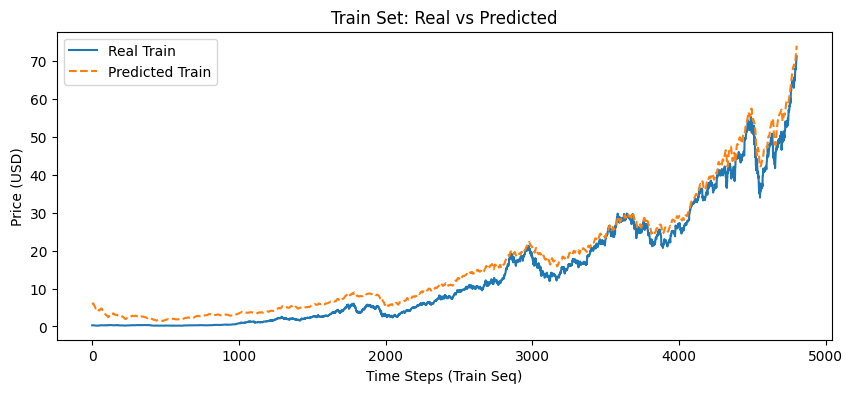

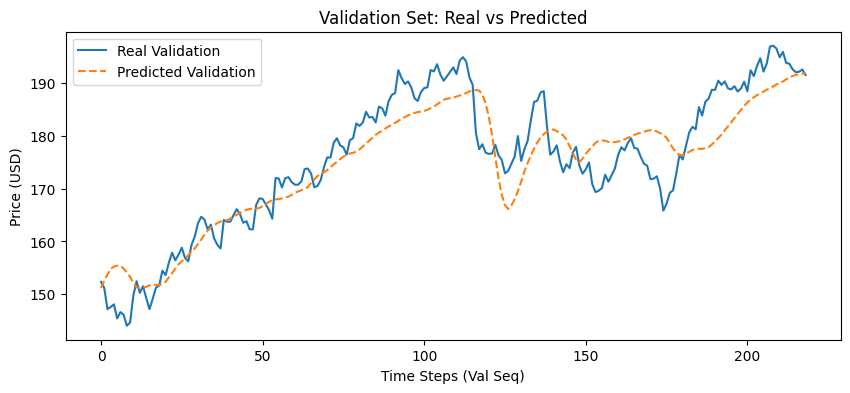

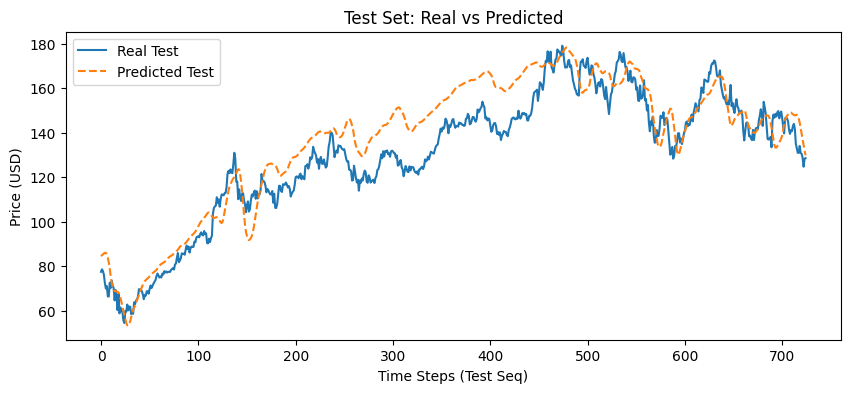

In [109]:
import matplotlib.pyplot as plt

# 1) Train Set
plt.figure(figsize=(10,4))
plt.plot(y_train_real, label='Real Train')
plt.plot(y_train_pred, label='Predicted Train', linestyle='--')
plt.title("Train Set: Real vs Predicted")
plt.xlabel("Time Steps (Train Seq)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# 2) Validation Set
plt.figure(figsize=(10,4))
plt.plot(y_val_real, label='Real Validation')
plt.plot(y_val_pred, label='Predicted Validation', linestyle='--')
plt.title("Validation Set: Real vs Predicted")
plt.xlabel("Time Steps (Val Seq)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# 3) Test Set
plt.figure(figsize=(10,4))
plt.plot(y_test_real, label='Real Test')
plt.plot(y_test_pred, label='Predicted Test', linestyle='--')
plt.title("Test Set: Real vs Predicted")
plt.xlabel("Time Steps (Test Seq)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

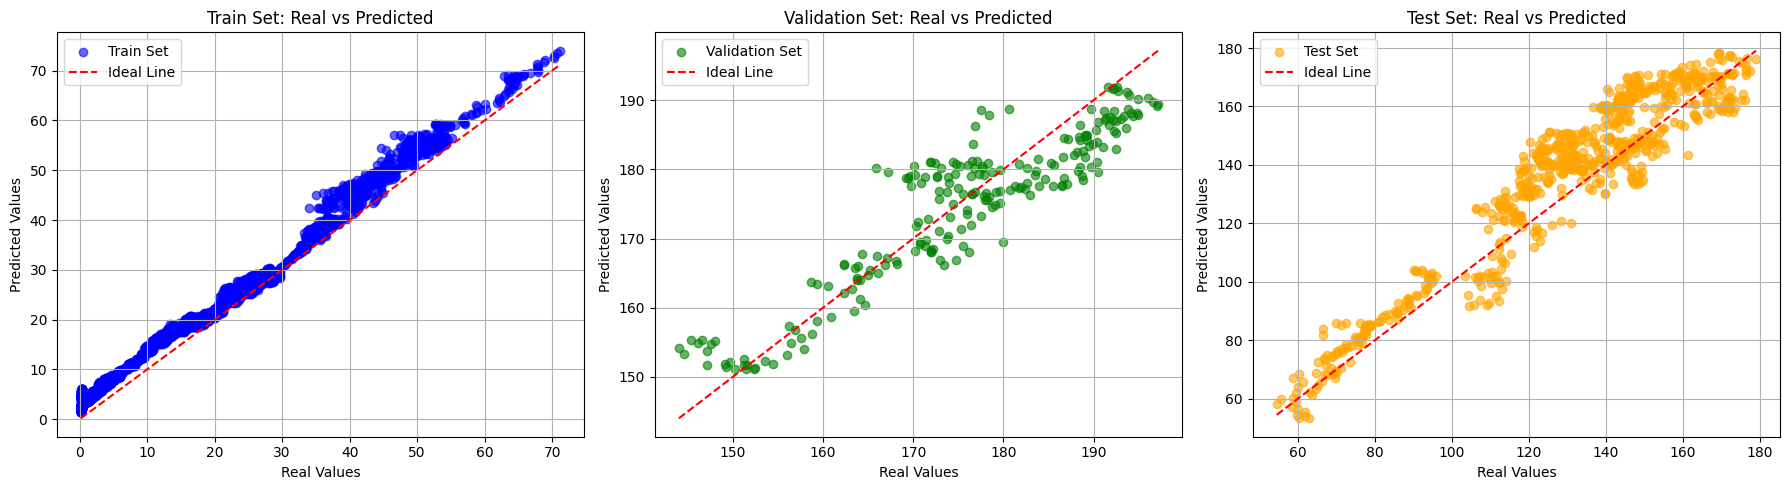

In [110]:
# Scatter Plots for Train, Validation, and Test Sets
plt.figure(figsize=(18, 5))

# Train set
plt.subplot(1, 3, 1)
plt.scatter(y_train_real, y_train_pred, alpha=0.6, color="blue", label="Train Set")
plt.plot(
    [min(y_train_real), max(y_train_real)],
    [min(y_train_real), max(y_train_real)],
    color="red", linestyle="--", label="Ideal Line"
)
plt.title("Train Set: Real vs Predicted")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)

# Validation set
plt.subplot(1, 3, 2)
plt.scatter(y_val_real, y_val_pred, alpha=0.6, color="green", label="Validation Set")
plt.plot(
    [min(y_val_real), max(y_val_real)],
    [min(y_val_real), max(y_val_real)],
    color="red", linestyle="--", label="Ideal Line"
)
plt.title("Validation Set: Real vs Predicted")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)

# Test set
plt.subplot(1, 3, 3)
plt.scatter(y_test_real, y_test_pred, alpha=0.6, color="orange", label="Test Set")
plt.plot(
    [min(y_test_real), max(y_test_real)],
    [min(y_test_real), max(y_test_real)],
    color="red", linestyle="--", label="Ideal Line"
)
plt.title("Test Set: Real vs Predicted")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [111]:
# Filtering Apple Data for 2024
# Select only Apple rows from pred_stock_data
apple_data_2024 = pred_stock_data[pred_stock_data['ticker'] == 'AAPL'].copy()

# Store 'open' prices separately
open_prices_2024 = apple_data_2024['open']

# Drop unnecessary columns
apple_data_2024 = apple_data_2024.drop(
    columns=['id', 'ticker', 'open', 'high', 'low', 'close', 'volume'],
    errors='ignore'
)

# Print the first few rows to check the data
print(apple_data_2024.head())

# Print the shape of this filtered dataset
print(f"Apple dataset (2024) shape: {apple_data_2024.shape}")


            date   adj_close
10853 2024-01-02  184.734970
10854 2024-01-03  183.351746
10855 2024-01-04  181.023163
10856 2024-01-05  180.296707
10857 2024-01-08  184.655365
Apple dataset (2024) shape: (252, 2)


In [112]:
apple_data_2024.head()

,date,adj_close
10853,2024-01-02,184.734970
10854,2024-01-03,183.351746
10855,2024-01-04,181.023163
10856,2024-01-05,180.296707
10857,2024-01-08,184.655365


In [113]:
# Computing Technical Indicators for Late 2023 + 2024

# Take the last 30 days of 2023 data for Apple
last_30_days_2023 = apple_data[['date', 'adj_close']].tail(30)

# Combine with 2024 data for rolling calculations
data_for_rolling = pd.concat([last_30_days_2023, apple_data_2024[['date', 'adj_close']]])

# Calculate technical indicators on the combined DataFrame
data_for_rolling = calculate_technical_indicators(data_for_rolling)

# Define the desired columns
technical_indicators_2024 = [
    'date',
    'ma7', 'ma20', 'ma30',
    'ema12', 'ema26',
    'macd', 'signal_line', 'macd_histogram',
    'volatility', 'bb_upper', 'bb_lower',
    'rsi'
]

# Keep only the relevant columns
data_for_rolling = data_for_rolling[technical_indicators_2024]

# Assign computed indicators back to apple_data_2024 for dates >= 2024-01-01
apple_data_2024[technical_indicators_2024] = data_for_rolling.loc[
    data_for_rolling['date'] >= '2024-01-01',
    technical_indicators_2024
]

In [114]:
apple_data_2024_new = apple_data_2024.copy()
apple_data_2024_new.head()

,date,adj_close,ma7,ma20,ma30,ema12,ema26,macd,signal_line,macd_histogram,volatility,bb_upper,bb_lower,rsi
10853,2024-01-02,184.734970,191.380990,193.082587,191.872681,191.745945,191.892432,-0.146487,0.805814,-0.952301,3.033742,198.874302,187.290871,31.663426
10854,2024-01-03,183.351746,189.898254,192.824849,191.692231,190.454530,191.259789,-0.805259,0.483600,-1.288858,4.026717,199.809855,185.839843,24.387766
10855,2024-01-04,181.023163,188.236396,192.252155,191.375782,189.003550,190.501520,-1.497970,0.087286,-1.585255,4.794777,201.010348,183.493962,8.867204
10856,2024-01-05,180.296707,186.548946,191.697869,191.061985,187.664036,189.745608,-2.081572,-0.346486,-1.735086,5.394552,201.961601,181.434138,7.864665
10857,2024-01-08,184.655365,185.469945,191.264492,190.871253,187.201164,189.368553,-2.167389,-0.710667,-1.456723,5.162822,201.962103,180.566881,24.906016


In [115]:
# Preparing Nasdaq and Gold Data for 2024

nasdaq_data_2024 = pred_index_data[pred_index_data['index_name'] == 'NQ=F'].copy()
nasdaq_data_2024 = nasdaq_data_2024.drop(
    columns=['id', 'index_name', 'open', 'high', 'low', 'close', 'volume'],
    errors='ignore'
)
print(nasdaq_data_2024.head())

gold_data_2024 = pred_macro_data[pred_macro_data['symbol'] == 'GC=F'].copy()
gold_data_2024 = gold_data_2024.drop(
    columns=['id', 'symbol', 'open', 'high', 'volume'],
    errors='ignore'
)
print(gold_data_2024.head())

# Rename columns for clarity
gold_data_2024 = gold_data_2024.rename(columns={
    'low': 'gold_low',
    'close': 'gold_close',
})

            date  adj_close
30249 2024-01-02   16720.00
30250 2024-01-03   16538.00
30251 2024-01-04   16445.00
30252 2024-01-05   16460.25
30253 2024-01-08   16803.75
           date          low        close
5854 2024-01-02  2057.100098  2064.399902
5855 2024-01-03  2034.199951  2034.199951
5856 2024-01-04  2038.000000  2042.300049
5857 2024-01-05  2042.400024  2042.400024
5858 2024-01-08  2019.099976  2026.599976


In [116]:
# Merging Apple 2024 with Nasdaq & Gold

merged_data_2024 = pd.merge(
    apple_data_2024_new,
    nasdaq_data_2024,
    on='date',
    how='inner',
    suffixes=('_apple', '_nasdaq')
)

merged_data_2024 = pd.merge(
    merged_data_2024,
    gold_data_2024,
    on='date',
    how='inner',
    suffixes=('', '_gold')
)

# Print shape and first few rows
print(merged_data_2024.shape)
print(merged_data_2024.head())

# Check for missing values
merged_data_2024.isnull().sum()

(252, 17)
        date  adj_close_apple         ma7        ma20        ma30       ema12  \
0 2024-01-02       184.734970  191.380990  193.082587  191.872681  191.745945   
1 2024-01-03       183.351746  189.898254  192.824849  191.692231  190.454530   
2 2024-01-04       181.023163  188.236396  192.252155  191.375782  189.003550   
3 2024-01-05       180.296707  186.548946  191.697869  191.061985  187.664036   
4 2024-01-08       184.655365  185.469945  191.264492  190.871253  187.201164   

        ema26      macd  signal_line  macd_histogram  volatility    bb_upper  \
0  191.892432 -0.146487     0.805814       -0.952301    3.033742  198.874302   
1  191.259789 -0.805259     0.483600       -1.288858    4.026717  199.809855   
2  190.501520 -1.497970     0.087286       -1.585255    4.794777  201.010348   
3  189.745608 -2.081572    -0.346486       -1.735086    5.394552  201.961601   
4  189.368553 -2.167389    -0.710667       -1.456723    5.162822  201.962103   

     bb_lower        r

date                0
adj_close_apple     0
ma7                 0
ma20                0
ma30                0
ema12               0
ema26               0
macd                0
signal_line         0
macd_histogram      0
volatility          0
bb_upper            0
bb_lower            0
rsi                 0
adj_close_nasdaq    0
gold_low            0
gold_close          0
dtype: int64

In [117]:
# Selecting Features for 2024

features = ["ma20", "adj_close_nasdaq", "gold_low", "volatility", "macd_histogram"]
target = "adj_close_apple"  # The target price to predict

# Extract feature matrix (X_2024) and target array (y_2024)
X_2024 = merged_data_2024[features].values
y_2024 = merged_data_2024[target].values

# Display feature matrix
X_2024

array([[ 1.93082587e+02,  1.67200000e+04,  2.05710010e+03,
         3.03374172e+00, -9.52301036e-01],
       [ 1.92824849e+02,  1.65380000e+04,  2.03419995e+03,
         4.02671704e+00, -1.28885833e+00],
       [ 1.92252155e+02,  1.64450000e+04,  2.03800000e+03,
         4.79477746e+00, -1.58525544e+00],
       ...,
       [ 2.48524500e+02,  2.16985000e+04,  2.61639990e+03,
         3.93023381e+00,  4.52553876e-01],
       [ 2.49267999e+02,  2.14162500e+04,  2.59700000e+03,
         3.52446176e+00, -1.24659287e-02],
       [ 2.49809499e+02,  2.12265000e+04,  2.60489990e+03,
         3.58169624e+00, -4.68732301e-01]], shape=(252, 5))

In [118]:
# Metrics Calculation Function and Strategy Loop

import numpy as np
import pandas as pd

def calculate_metrics(portfolio_values, benchmark_values, risk_free_rate=0.03, freq='daily'):
    """
    Calculate trading/backtest metrics: Net Profit, ROI, Win Rate, Sharpe Ratio, Beta, R².
    :param portfolio_values: (array-like) Portfolio value at each time step
    :param benchmark_values: (array-like) Benchmark or buy & hold value at each time step
    :param risk_free_rate: Annual risk-free rate (e.g., 0.03 = 3%)
    :param freq: 'daily' or 'weekly' or 'annual' for interpreting the risk-free rate
    :return: A dictionary of metrics
    """
    # 1) Net Profit
    initial_val = portfolio_values[0]
    final_val = portfolio_values[-1]
    net_profit = final_val - initial_val
    
    # 2) ROI
    roi = net_profit / initial_val
    
    # 3) Daily returns of the portfolio
    portfolio_returns = pd.Series(portfolio_values).pct_change().dropna()
    
    # 4) Win Rate (proportion of days with positive daily return)
    win_rate = (portfolio_returns > 0).sum() / len(portfolio_returns)
    
    # 5) Sharpe Ratio
    if freq == 'daily':
        # Approx. daily rate assuming 252 trading days
        daily_rf = (1 + risk_free_rate)**(1/252) - 1
    elif freq == 'weekly':
        daily_rf = (1 + risk_free_rate)**(1/52) - 1
    else:
        daily_rf = risk_free_rate
    
    excess_returns = portfolio_returns - daily_rf
    sharpe_ratio = excess_returns.mean() / (excess_returns.std() + 1e-9)
    
    # 6) Beta
    benchmark_returns = pd.Series(benchmark_values).pct_change().dropna()
    min_len = min(len(portfolio_returns), len(benchmark_returns))
    pr = portfolio_returns.iloc[-min_len:]
    br = benchmark_returns.iloc[-min_len:]
    
    cov_pb = np.cov(pr, br)[0, 1]
    var_b = np.var(br)
    beta = cov_pb / (var_b + 1e-9)
    
    # 7) R²
    residuals = portfolio_values - benchmark_values
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((portfolio_values - np.mean(portfolio_values))**2)
    r2 = 1 - (ss_res / ss_tot)
    
    return {
        'Net Profit': net_profit,
        'ROI': roi,
        'Win Rate': win_rate,
        'Sharpe Ratio': sharpe_ratio,
        'Beta': beta,
        'R_2': r2
    }


In [119]:
# Define strategy parameters
initial_capital = 100_000.0
portfolio_cash = initial_capital
shares_held = 0
fee_rate = 1 / 1000
window_size = 20
threshold_buy = 0.08
threshold_sell = 0.06
rsi_upper = 70
rsi_lower = 30

# Partial buy/sell rates
partial_buy_rate = 0.3
partial_sell_rate = 0.5

actions_log = []  # Will store (date, action, price, portfolio_cash, shares_held, y_pred, rsi, macd_signal_diff)

for i in range(window_size, len(X_2024) - 1):
    # A) Select last 20 days of features
    X_window_raw = X_2024[i - window_size : i]
    X_window_scaled = scaler_X.transform(X_window_raw)
    X_window_scaled = X_window_scaled.reshape(1, window_size, -1)

    # B) Predict next day's price
    y_pred_scaled = best_model.predict(X_window_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)[0, 0]

    # C) Retrieve RSI and MACD histogram
    rsi = merged_data_2024.loc[i, 'rsi']
    macd_signal_diff = merged_data_2024.loc[i, 'macd_histogram']

    # D) Get tomorrow's open price and today's open price
    tomorrow_open_price = open_prices_2024.iloc[i]
    today_open_price = open_prices_2024.iloc[i - 1]

    # E) Decide action based on thresholds + RSI + MACD
    action = "HOLD"
    if (y_pred > today_open_price * (1 + threshold_buy)
        and rsi < rsi_upper
        and macd_signal_diff > 0):
        action = "BUY"
        cash_to_use = portfolio_cash * partial_buy_rate
        fee_amount = cash_to_use * fee_rate
        if portfolio_cash > fee_amount:
            shares_to_buy = cash_to_use / tomorrow_open_price
            portfolio_cash -= (cash_to_use + fee_amount)
            shares_held += shares_to_buy
    elif (y_pred < today_open_price * (1 - threshold_sell)
          and rsi > rsi_lower
          and macd_signal_diff < 0):
        action = "SELL"
        shares_to_sell = shares_held * partial_sell_rate
        if shares_held > 0:
            proceeds = shares_to_sell * tomorrow_open_price
            fee_amount = proceeds * fee_rate
            portfolio_cash += (proceeds - fee_amount)
            shares_held -= shares_to_sell

    actions_log.append((
        merged_data_2024["date"].values[i],
        action,
        tomorrow_open_price,
        portfolio_cash,
        shares_held,
        y_pred,
        rsi,
        macd_signal_diff
    ))

# Final sell if any shares remain
if shares_held > 0:
    last_open_price = open_prices_2024.iloc[-1]
    proceeds = shares_held * last_open_price
    fee_amount = proceeds * fee_rate
    portfolio_cash += (proceeds - fee_amount)
    shares_held = 0
    actions_log.append((
        merged_data_2024["date"].values[-1],
        "FINAL_SELL",
        last_open_price,
        portfolio_cash,
        0,
        None,
        None,
        None
    ))

# Final portfolio value
final_portfolio_value = portfolio_cash
net_profit = final_portfolio_value - initial_capital
ROI = net_profit / initial_capital

print("=== BASIC RESULTS ===")
print(f"Final portfolio value: {final_portfolio_value:.2f} USD")
print(f"Net Profit: {net_profit:.2f} USD")
print(f"ROI: {ROI*100:.2f}%")

# Buy & hold comparison
first_open_price = open_prices_2024.iloc[window_size]
shares_if_buy_hold = initial_capital / first_open_price
last_open_price = open_prices_2024.iloc[-1]
value_buy_hold = shares_if_buy_hold * last_open_price
success_ratio = final_portfolio_value / value_buy_hold

print(f"Buy & hold final value: {value_buy_hold:.2f} USD")
print(f"Model success ratio => {success_ratio:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━

In [120]:
# Additional metrics
df_actions = pd.DataFrame(actions_log, columns=[
    "date", "action", "price", "portfolio_cash", "shares_held", "y_pred", "rsi", "macd_signal_diff"
])
df_actions["portfolio_value"] = df_actions["portfolio_cash"] + df_actions["shares_held"] * df_actions["price"]
df_actions["buy_hold_value"] = shares_if_buy_hold * df_actions["price"]

portfolio_values = df_actions["portfolio_value"].values
benchmark_values = df_actions["buy_hold_value"].values

metrics = calculate_metrics(
    portfolio_values=portfolio_values,
    benchmark_values=benchmark_values,
    risk_free_rate=0.03,
    freq='daily'
)

print("\n=== BACKTEST METRICS (Partial Strategy) ===")
for k, v in metrics.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")
    else:
        print(f"{k}: {v}")

# Action distribution
action_counts = df_actions['action'].value_counts()
print("\nActions distribution:")
print(action_counts)


=== BACKTEST METRICS (Partial Strategy) ===
Net Profit: 23872.5596
ROI: 0.2387
Win Rate: 0.4329
Sharpe Ratio: 0.0910
Beta: 0.3503
R_2: 0.5687

Actions distribution:
action
HOLD          162
SELL           48
BUY            21
FINAL_SELL      1
Name: count, dtype: int64


In [121]:
df_actions.head()

,date,action,price,portfolio_cash,shares_held,y_pred,rsi,macd_signal_diff,portfolio_value,buy_hold_value
0,2024-01-31,HOLD,187.039993,100000.0,0.0,189.907867,46.739538,-0.048825,100000.0,100000.000000
1,2024-02-01,HOLD,183.990005,100000.0,0.0,189.840591,52.166498,-0.209150,100000.0,98369.339231
2,2024-02-02,HOLD,179.860001,100000.0,0.0,189.765839,49.883298,-0.361735,100000.0,96161.252709
3,2024-02-05,HOLD,188.149994,100000.0,0.0,189.638565,56.857387,-0.320286,100000.0,100593.456293
4,2024-02-06,HOLD,186.860001,100000.0,0.0,189.544067,60.960286,-0.171999,100000.0,99903.767813


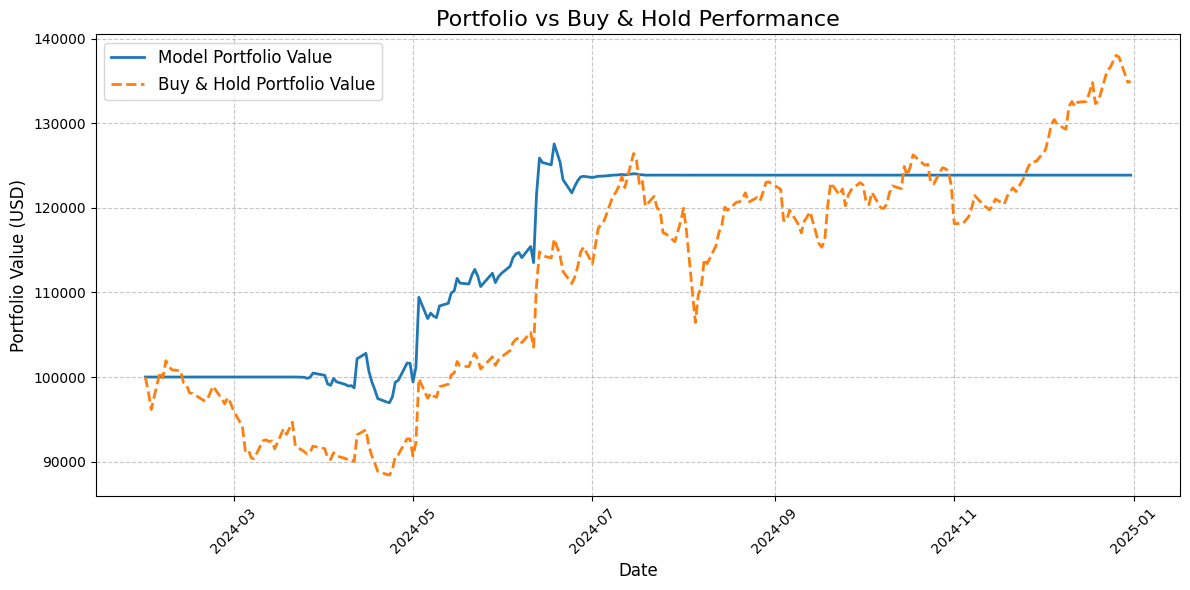

In [122]:
# Plotting Portfolio vs. Buy & Hold

import matplotlib.pyplot as plt

# Retrieve dates and portfolio values
dates = df_actions["date"]
portfolio_values = df_actions["portfolio_value"]
buy_hold_values = df_actions["buy_hold_value"]

# Create a line plot to compare the model strategy vs. buy & hold
plt.figure(figsize=(12, 6))

plt.plot(dates, portfolio_values, label="Model Portfolio Value", linewidth=2)
plt.plot(dates, buy_hold_values, label="Buy & Hold Portfolio Value", linestyle="--", linewidth=2)

plt.title("Portfolio vs Buy & Hold Performance", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Portfolio Value (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


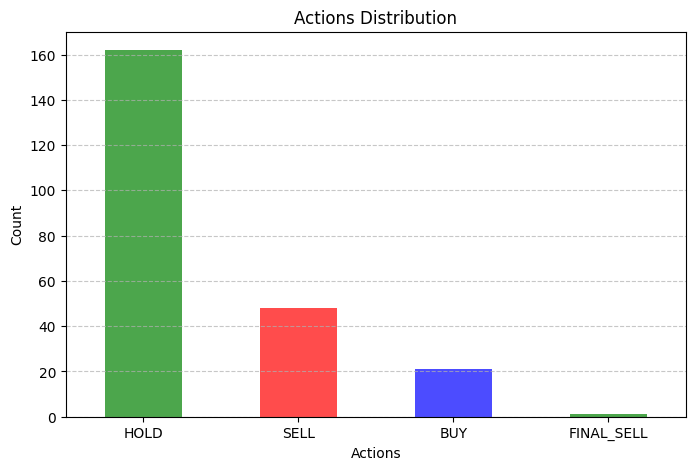

In [123]:
# Bar Chart of Actions Distribution

plt.figure(figsize=(8, 5))
action_counts.plot(kind='bar', color=['green', 'red', 'blue'], alpha=0.7)
plt.title('Actions Distribution')
plt.xlabel('Actions')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [124]:
# Function to Write Predictions to PostgreSQL

def write_predictions_to_postgresql(predictions_df, table_name, engine):
    """
    Writes prediction results to a PostgreSQL table.
    
    :param predictions_df: DataFrame containing the prediction results
    :param table_name: Target table name in PostgreSQL
    :param engine: SQLAlchemy engine object
    """
    try:
        predictions_df.to_sql(
            name=table_name,
            con=engine,
            if_exists='append',  # Append to existing table
            index=False          # Do not write DataFrame index
        )
        print(f"{len(predictions_df)} rows have been written to table '{table_name}'.")
    except Exception as e:
        print("Error occurred while writing data:", e)

In [125]:
# Preparing DataFrame and Renaming Columns Before Saving

# Convert actions_log to a DataFrame
df_actions = pd.DataFrame(actions_log, columns=[
    "date", "action", "price", "portfolio_cash", "shares_held", "y_pred", "rsi", "macd_signal_diff"
])

# Add portfolio_value and buy_hold_value columns
df_actions["portfolio_value"] = df_actions["portfolio_cash"] + df_actions["shares_held"] * df_actions["price"]
df_actions["buy_hold_value"] = shares_if_buy_hold * df_actions["price"]

# Create a new DataFrame for saving predictions
predictions_df = df_actions[["date", "action", "price", "portfolio_value"]].copy()
predictions_df.rename(columns={
    "date": "trade_date",
    "action": "trade_action",
    "price": "predicted_price",
    "portfolio_value": "final_portfolio_value"
}, inplace=True)


In [126]:
# Saving Predictions to PostgreSQL

write_predictions_to_postgresql(
    predictions_df=predictions_df,
    table_name="stock_predictions",  # Target table name
    engine=engine
)


232 rows have been written to table 'stock_predictions'.


In [127]:
'''CREATE TABLE stock_predictions (
    id SERIAL PRIMARY KEY,       
    trade_date DATE NOT NULL,  
    trade_action VARCHAR(10),    
    predicted_price DECIMAL,       
    final_portfolio_value DECIMAL, 
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP 
);
'''

'CREATE TABLE stock_predictions (\n    id SERIAL PRIMARY KEY,       \n    trade_date DATE NOT NULL,  \n    trade_action VARCHAR(10),    \n    predicted_price DECIMAL,       \n    final_portfolio_value DECIMAL, \n    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP \n);\n'